In [293]:
import pandas as pd
import seaborn as sns
import warnings
from sklearn import preprocessing
import numpy as np
warnings.simplefilter("ignore")

In [294]:
df = pd.read_excel('./BBDD_Hospitalización.xlsx')
# VARIABLE objetivo hospitalizados
#df.head()
df.shape

(570, 20)

In [295]:
# Understanding My Variables
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [296]:
# Print all rows with NaN values:
#df[df.isnull().any(axis=1)]
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [297]:
# Cleaning my dataset
# Drop only the rows which has all values NaN
df.dropna(axis=0, how='all', inplace = True)
print("There are {} missing values in the data.".format(df.isna().sum().sum())) 


There are 30 missing values in the data.


In [298]:
# Replace NaN values with 0 meaning have no cancer
df["PSA"].fillna(value=0, inplace=True) 

In [299]:
# Replacing nan values with "NO" meaning does no have any "AGENTE AISLADO"
df["AGENTE AISLADO"].fillna(value="NO", inplace=True)

In [300]:
df["HOSPITALIZACION"].fillna(value="NO", inplace=True)

In [301]:
df["BIOPSIAS PREVIAS"].fillna(value="NO", inplace=True)

In [302]:
df["ENF. CRONICA PULMONAR OBSTRUCTIVA"].fillna(value="NO", inplace=True)

In [303]:
df["CUP"].fillna(value="NO", inplace=True)

In [304]:
df["VOLUMEN PROSTATICO"].fillna(value="NO", inplace=True)

In [305]:
# NO NULL VALUES
df.isna().sum().sum()

0

In [306]:
# Normalize cols name
df.rename(columns={'DIAS HOSPITALIZACIÓN UPC': "DIAS HOSPITALIZACION UPC", 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACION INFECCIOSA", 'HOSPITALIZACIÓN ULTIMO MES': 'HOSPITALIZACION ULTIMO MES'}, inplace=True)

In [307]:
df.tail()
#df.shape

,EDAD,DIABETES,HOSPITALIZACION ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACION INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACION UPC
563,67.0,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [308]:
# Normalize table names
df.columns = [col_name.replace(".", "").replace(" ", " ") for col_name in df.columns]
df.columns


Index(['EDAD', 'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACION INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACION UPC'],
      dtype='object')

In [309]:
df.head()

,EDAD,DIABETES,HOSPITALIZACION ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACION INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACION UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [310]:
cols = [
  "DIABETES",
  "HOSPITALIZACION ULTIMO MES",
  "BIOPSIAS PREVIAS",
  "VOLUMEN PROSTATICO",
  "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS",
  "CUP",
  "ENF CRONICA PULMONAR OBSTRUCTIVA",
  "BIOPSIA",
  "FIEBRE",
  "ITU",
  "TIPO DE CULTIVO",
  "AGENTE AISLADO",
  "PATRON DE RESISTENCIA",
  "HOSPITALIZACION",
]
#
#"NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACION INFECCIOSA",

In [311]:
for col in cols:
  print(df[col].unique())

['NO' 'SI']
['NO' 'SI']
['NO' 'SI']
['SI' 'NO']
['FLUOROQUINOLONA_AMINOGLICOSIDO' 'CEFALOSPORINA_AMINOGLUCOCIDO'
 'OROQUINOLONAS' 'FLUOROQUINOLONA_AMINOGLICÓSIDO' 'OTROS']
['NO' 'SI']
['NO' 'SI, EPOC' 'SI, ASMA' 'SI']
['NEG' 'ADENOCARCINOMA GLEASON 6 ' 'ADENOCARCINOMA GLEASON 7 '
 'ADENOCARCINOMA GLEASON 6' 'ADENOCARCINOMA GLEASON 10 '
 'ADENOCARCINOMA GLEASON 9 ' 'ADENOCARCINOMA GLEASON 8 ' 'PROSTATITIS'
 'HIPERPLASIA PROSTATICA' 'ADENOCARCINOMA GLEASON 7'
 'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS']
['SI' 'NO']
['NO' 'SI']
['NO' 'HEMOCULTIVO' 'UROCULTIVO' 'HEMOCULTIVO Y UROCULTIVO']
['NO' 'E.COLI' 'PSEUDOMONAS AERUGINOSA']
['NO' ' AMPI R, CIPRO R, GENTA R, SULFA M R'
 'RESISTENTE A AMPI, CIPRO Y GENTA'
 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA'
 'MULTI SENSIBLE']
['SI' 'NO']


In [312]:
# Transform variables categoricas a cuantitativas
le = preprocessing.LabelEncoder()

for col in cols:
  df[col] = le.fit_transform(df[col])

  #print(df[col].unique())
  # df_cleaned[col] = le.fit_transform(df[col])

In [313]:
df.describe()

,EDAD,DIABETES,HOSPITALIZACION ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACION UPC
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,63.882042,0.110915,0.008803,13.177940,0.098592,0.71831,1.193662,12.996479,0.007042,0.056338,6.936620,0.065141,0.010563,1.996479,0.992958,2.003521,0.042254,0.165493,0.014085
std,9.281517,0.314304,0.093492,15.653058,0.298376,0.45022,0.928386,3.921180,0.083696,0.331203,2.776101,0.246992,0.102324,0.157095,0.118573,0.167947,0.201344,0.958066,0.196474
min,39.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,5.600000,0.000000,0.00000,1.000000,12.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,64.000000,0.000000,0.000000,8.000000,0.000000,1.00000,1.000000,12.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,69.000000,0.000000,0.000000,15.000000,0.000000,1.00000,1.000000,12.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
max,151.000000,1.000000,1.000000,100.000000,1.000000,1.00000,4.000000,24.000000,1.000000,3.000000,10.000000,1.000000,1.000000,3.000000,2.000000,4.000000,1.000000,12.000000,3.000000


In [314]:
#df.describe()
# Reemplazar los valores atípicos con el valor promedio
df['EDAD'] = df['EDAD'].apply(lambda x: df['EDAD'].mean() if x > 140 else x)

<Axes: >

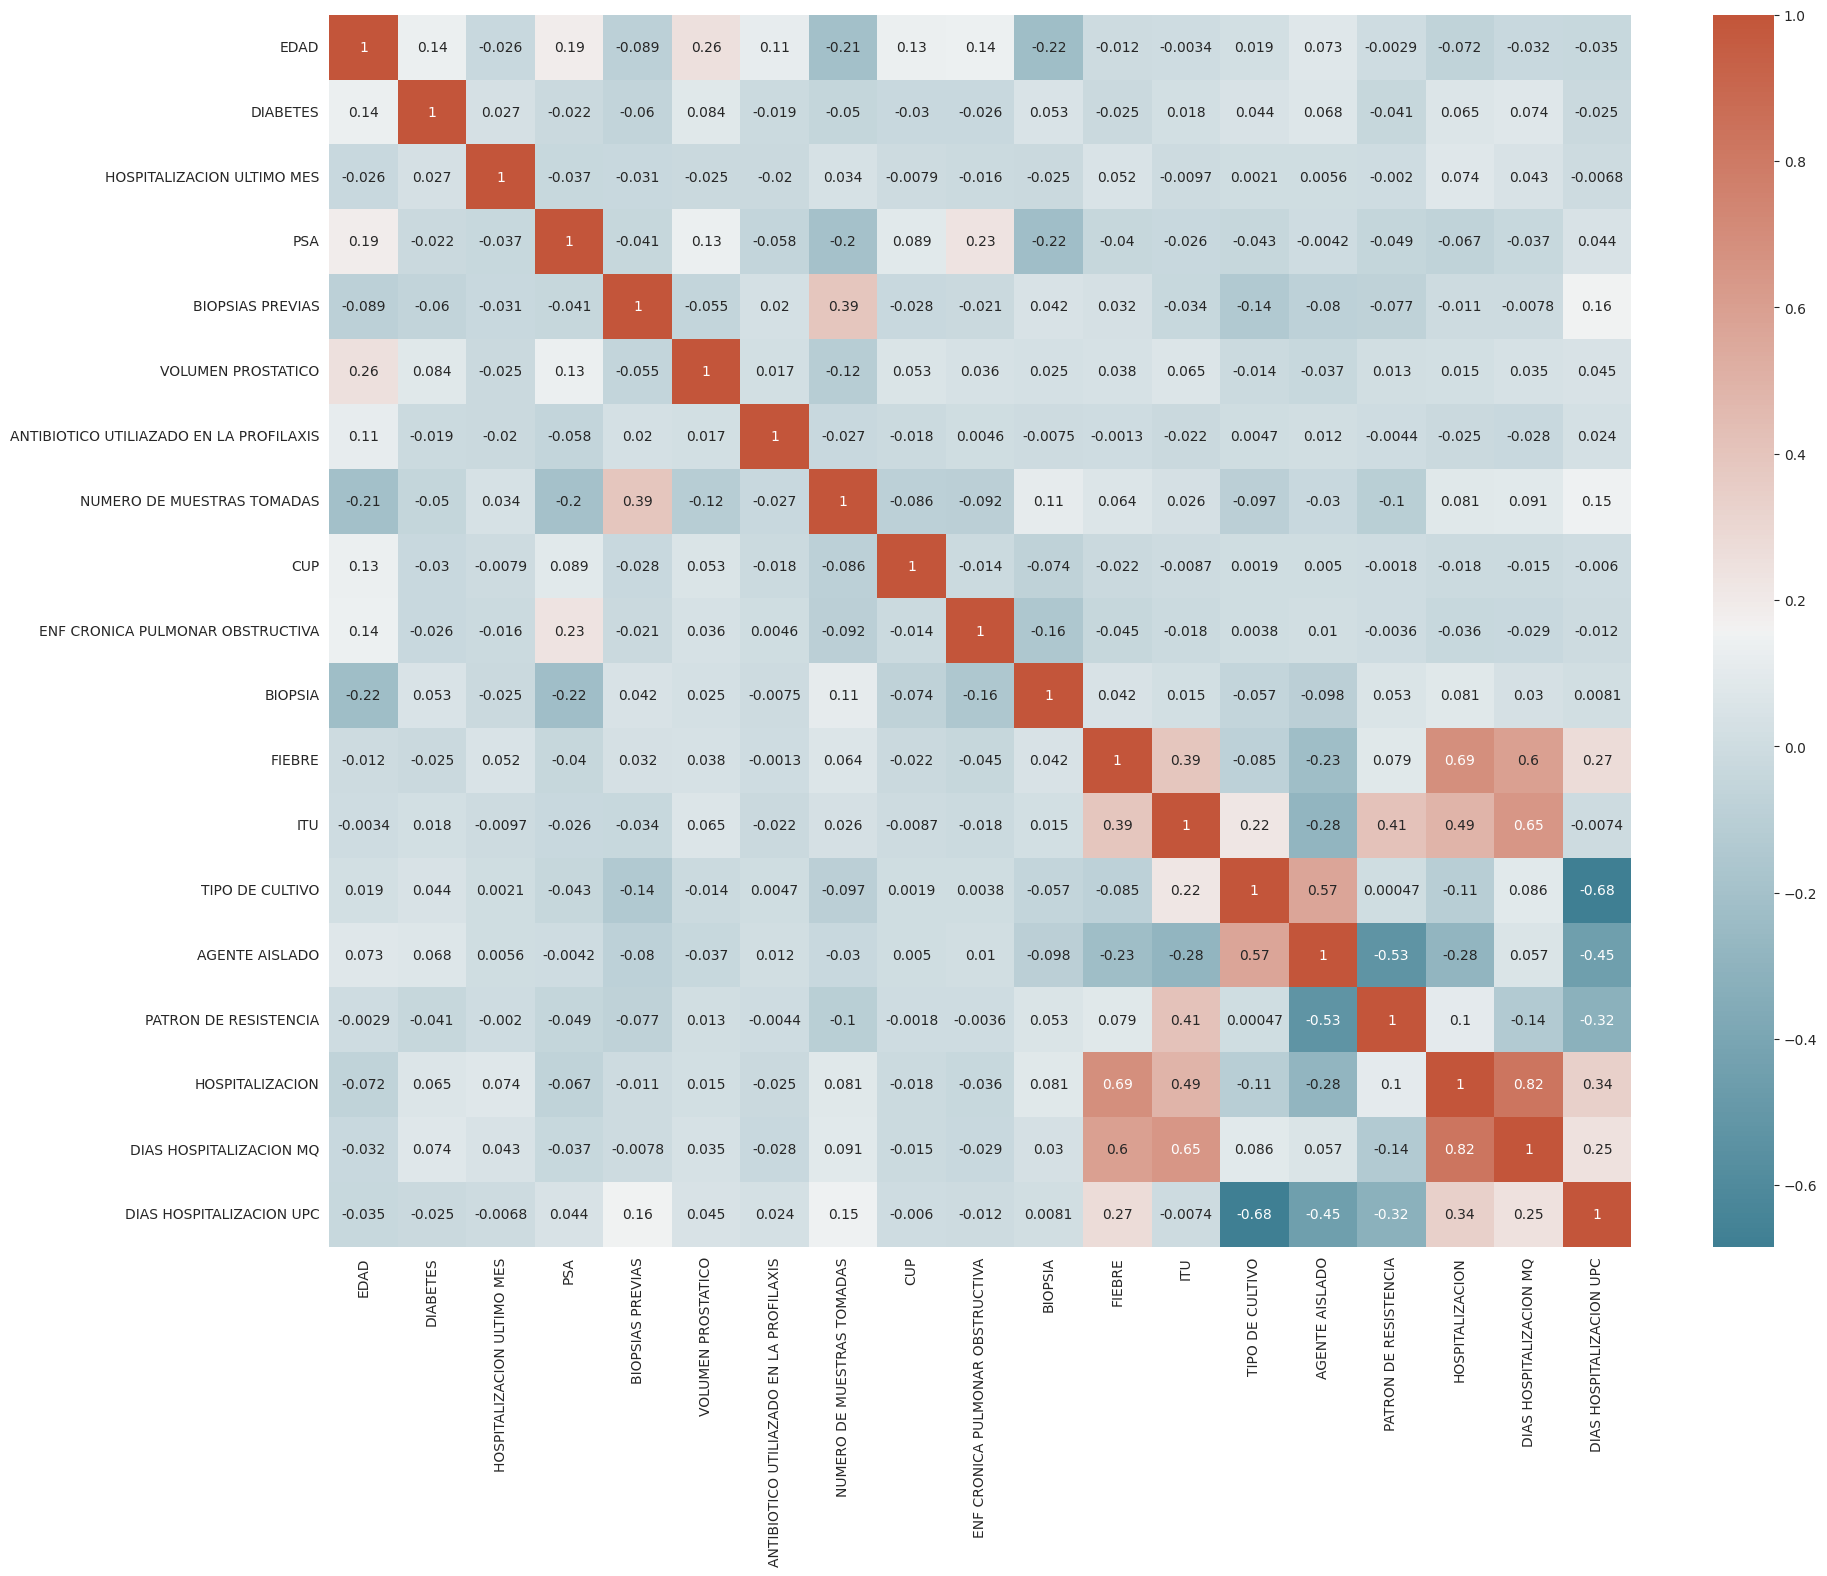

In [315]:
# Print our map of correlations by cols
plt.figure(figsize=(21,16))
#sns.boxplot(df)
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
# los pacietes quedan hospitalizados por fiebre e itu(infecciones tracto urinario)

In [ ]:
#sns.set_style('darkgrid')
#Regresion lineal
#sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [ ]:
import matplotlib.pyplot as plt